## Loading Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('E:\\Python\\Data\\1000_educational_data.csv')

In [4]:
df.head()

math_score  science_score  study_hours  reading_score  final_marks  \
0       68.53          52.05         4.75          37.35       323.10   
1       43.47          23.83         2.93          23.88       292.62   
2       61.05          64.08         4.82          50.39       325.49   
3       62.65          50.01         5.76          26.38       428.42   
4       58.67          30.86         4.38          51.66       327.54   

   employment_status  religion  geographic_info  teaching_method  \
0                  0         3                0                3   
1                  0         2                1                2   
2                  1         2                1                3   
3                  0         4                0                1   
4                  0         2                1                3   

   teaching_materials  ...  passed  attendance_rate  class_participation  \
0                   1  ...       1               70                    2   
1                   1  ...       1               44                    9   
2                   3  ...       1               79                    8   
3                   2  ...       1               43                    2   
4                   1  ...       1               90                    3   

   assignment_completed  presentation_marks  group_work  field_work  \
0                     0                   4           2          13   
1                     3                   8           1           7   
2                     8                   5           8          17   
3                     6                   7           7           6   
4                     4                  10           3           2   

   graduation_status  scholarship  online_learning  
0                  1            1                0  
1                  0            1                0  
2                  1            0                1  
3                  0            0                0  
4                  1            0                1  

[5 rows x 21 columns]

In [5]:
from skimpy import skim

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ int32       │ 16    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ math_score             │   0 │     0 │  54.69 │    15.3 │     10 │  44.54 │ 54.93 │ 65.72 │    95 │ ▁▃▇▇▅▁ │  │
│ │ science_score          │   0 │     0 │  50.73 │   12.04 │     10 │  42.72 │ 51.03 │ 58.78 │ 85.11 │  ▂▆▇▃▁ │  │
│ │ study_hours            │   0 │     0 │  4.347 │  0.8071 │   1.65 │   3.92 │  4.48 │  4.88 │  6.54 │  ▂▃▇▃  │  │
│ │ reading_score          │   0 │     0 │  49.94 │   20.06 │      1 │  35.79 │ 50.61 │ 63.86 │   100 │ ▂▅▇▇▃▁ │  │
│ │ final_marks            │   0 │     0 │  350.9 │   52.26 │  183.8 │  316.5 │ 350.1 │ 386.2 │   500 │  ▂▇▇▃▁ │  │
│ │ employment_status      │   0 │     0 │  0.477 │  0.4997 │      0 │      0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ │ religion               │   0 │     0 │  2.565 │   1.127 │      1 │      2 │     3 │     4 │     4 │ ▇ ▇ ▇▇ │  │
│ │ geographic_info        │   0 │     0 │  0.507 │  0.5002 │      0 │      0 │     1 │     1 │     1 │ ▇    ▇ │  │
│ │ teaching_method        │   0 │     0 │  1.919 │  0.8204 │      1 │      1 │     2 │     3 │     3 │ ▇  ▇ ▆ │  │
│ │ teaching_materials     │   0 │     0 │  1.963 │  0.8369 │      1 │      1 │     2 │     3 │     3 │ ▇  ▆ ▇ │  │
│ │ technology_use         │   0 │     0 │  0.495 │  0.5002 │      0 │      0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ │ passed                 │   0 │     0 │  0.968 │  0.1761 │      0 │      1 │     1 │     1 │     1 │      ▇ │  │
│ │ attendance_rate        │   0 │     0 │  70.79 │   17.54 │     40 │  55.75 │    71 │    86 │   100 │ ▆▆▇▇▇▇ │  │
│ │ class_participation    │   0 │     0 │  5.275 │   3.178 │      0 │      2 │     5 │     8 │    10 │ ▆▆▃▇▇▇ │  │
│ │ assignment_completed   │   0 │     0 │  5.266 │   3.145 │      0 │      3 │     5 │     8 │    10 │ ▆▇▃▇▇▇ │  │
│ │ presentation_marks     │   0 │     0 │   5.04 │    3.16 │      0 │      2 │     5 │     8 │    10 │ ▇▇▃▇▆▇ │  │
│ │ group_work             │   0 │     0 │  4.996 │   3.094 │      0 │      2 │     5 │     8 │    10 │ ▇▇▅▇▇▇ │  │
│ │ field_work             │   0 │     0 │  10.29 │   6.048 │      0 │      5 │    10 │    15 │    20 │ ▇▅▆▇▆▇ │  │
│ │ graduation_status      │   0 │     0 │  0.512 │  0.5001 │      0 │      0 │     1 │     1 │     1 │ ▇    ▇ │  │
│ │ scholarship            │   0 │     0 │  0.543 │  0.4984 │      0 │      0 │     1 │     1 │     1 │ ▇    ▇ │  │
│ │ online_learning        │   0 │     0 │  0.486 │  0.5001 │      0 │      0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ └────────────────────────┴─────┴───────┴────────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── 

In [7]:
df.describe()

math_score  science_score  study_hours  reading_score  final_marks  \
count  1000.000000    1000.000000  1000.000000    1000.000000  1000.000000   
mean     54.689740      50.731780     4.347180      49.941560   350.912240   
std      15.297087      12.041751     0.807099      20.056374    52.255651   
min      10.000000      10.000000     1.650000       1.000000   183.850000   
25%      44.537500      42.715000     3.920000      35.792500   316.450000   
50%      54.930000      51.035000     4.480000      50.615000   350.105000   
75%      65.725000      58.782500     4.880000      63.855000   386.225000   
max      95.000000      85.110000     6.540000     100.000000   500.000000   

       employment_status     religion  geographic_info  teaching_method  \
count        1000.000000  1000.000000      1000.000000      1000.000000   
mean            0.477000     2.565000         0.507000         1.919000   
std             0.499721     1.126519         0.500201         0.820434   
min             0.000000     1.000000         0.000000         1.000000   
25%             0.000000     2.000000         0.000000         1.000000   
50%             0.000000     3.000000         1.000000         2.000000   
75%             1.000000     4.000000         1.000000         3.000000   
max             1.000000     4.000000         1.000000         3.000000   

       teaching_materials  ...       passed  attendance_rate  \
count         1000.000000  ...  1000.000000      1000.000000   
mean             1.963000  ...     0.968000        70.792000   
std              0.836858  ...     0.176088        17.537397   
min              1.000000  ...     0.000000        40.000000   
25%              1.000000  ...     1.000000        55.750000   
50%              2.000000  ...     1.000000        71.000000   
75%              3.000000  ...     1.000000        86.000000   
max              3.000000  ...     1.000000       100.000000   

       class_participation  assignment_completed  presentation_marks  \
count          1000.000000           1000.000000         1000.000000   
mean              5.275000              5.266000            5.040000   
std               3.177967              3.145018            3.160124   
min               0.000000              0.000000            0.000000   
25%               2.000000              3.000000            2.000000   
50%               5.000000              5.000000            5.000000   
75%               8.000000              8.000000            8.000000   
max              10.000000             10.000000           10.000000   

        group_work   field_work  graduation_status  scholarship  \
count  1000.000000  1000.000000        1000.000000  1000.000000   
mean      4.996000    10.294000           0.512000     0.543000   
std       3.093793     6.048483           0.500106     0.498397   
min       0.000000     0.000000           0.000000     0.000000   
25%       2.000000     5.000000           0.000000     0.000000   
50%       5.000000    10.000000           1.000000     1.000000   
75%       8.000000    15.000000           1.000000     1.000000   
max      10.000000    20.000000           1.000000     1.000000   

       online_learning  
count      1000.000000  
mean          0.486000  
std           0.500054  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  

[8 rows x 21 columns]

In [8]:
df.tail()

math_score  science_score  study_hours  reading_score  final_marks  \
995       55.46          55.98         4.36          60.31       347.90   
996       63.45          62.00         5.40          29.93       300.11   
997       44.20          54.68         4.82          47.80       374.07   
998       64.60          64.39         4.71          17.29       425.04   
999       39.88          60.49         4.79          77.12       335.81   

     employment_status  religion  geographic_info  teaching_method  \
995                  0         4                0                2   
996                  1         4                1                2   
997                  0         4                0                2   
998                  1         3                1                2   
999                  0         4                0                1   

     teaching_materials  ...  passed  attendance_rate  class_participation  \
995                   2  ...       1               92                   10   
996                   2  ...       1               43                    2   
997                   2  ...       1               49                    8   
998                   2  ...       1               65                    6   
999                   1  ...       1               79                    2   

     assignment_completed  presentation_marks  group_work  field_work  \
995                     0                   5           0           9   
996                     5                   4           7           5   
997                     3                   3           1          13   
998                     3                   5           3           8   
999                     0                   5           3          17   

     graduation_status  scholarship  online_learning  
995                  1            1                1  
996                  1            0                0  
997                  1            0                1  
998                  1            0                1  
999                  1            0                0  

[5 rows x 21 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   math_score            1000 non-null   float64
 1   science_score         1000 non-null   float64
 2   study_hours           1000 non-null   float64
 3   reading_score         1000 non-null   float64
 4   final_marks           1000 non-null   float64
 5   employment_status     1000 non-null   int64  
 6   religion              1000 non-null   int64  
 7   geographic_info       1000 non-null   int64  
 8   teaching_method       1000 non-null   int64  
 9   teaching_materials    1000 non-null   int64  
 10  technology_use        1000 non-null   int64  
 11  passed                1000 non-null   int64  
 12  attendance_rate       1000 non-null   int64  
 13  class_participation   1000 non-null   int64  
 14  assignment_completed  1000 non-null   int64  
 15  presentation_marks    

In [10]:
df.shape

(1000, 21)

In [11]:
df.columns

Index(['math_score', 'science_score', 'study_hours', 'reading_score',
       'final_marks', 'employment_status', 'religion', 'geographic_info',
       'teaching_method', 'teaching_materials', 'technology_use', 'passed',
       'attendance_rate', 'class_participation', 'assignment_completed',
       'presentation_marks', 'group_work', 'field_work', 'graduation_status',
       'scholarship', 'online_learning'],
      dtype='object')

In [12]:
df.groupby('technology_use').size()

technology_use
0    505
1    495
dtype: int64

In [13]:
df.groupby('teaching_materials').size()

teaching_materials
1    369
2    299
3    332
dtype: int64

In [14]:
df.groupby('passed').size()

passed
0     32
1    968
dtype: int64

In [15]:
df.groupby('graduation_status').size()

graduation_status
0    488
1    512
dtype: int64

## Visualization

In [16]:
import matplotlib.pyplot as plt

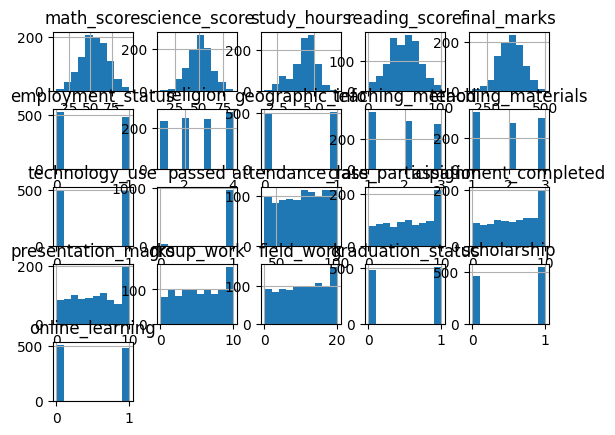

In [17]:
df.hist()
plt.show()

### Creating a Validation Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df.columns

Index(['math_score', 'science_score', 'study_hours', 'reading_score',
       'final_marks', 'employment_status', 'religion', 'geographic_info',
       'teaching_method', 'teaching_materials', 'technology_use', 'passed',
       'attendance_rate', 'class_participation', 'assignment_completed',
       'presentation_marks', 'group_work', 'field_work', 'graduation_status',
       'scholarship', 'online_learning'],
      dtype='object')

In [20]:
array = df.values
X = array[:, 0:5] # 0:5 means 0,1,2,3,4 columns and all the rows of these columns
y = array[:, 18] # 18th column and all the rows of this column --- Graduation Status 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)   

## Building Models 

In [21]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluate each model in turn
results = []
names = []  

for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name, cv_results.mean(), cv_results.std()))

LR: 0.531250 (0.063307)
LDA: 0.520000 (0.062550)
KNN: 0.507500 (0.047828)
CART: 0.502500 (0.048023)
NB: 0.543750 (0.056803)
SVM: 0.508750 (0.014843)


### Note: Neither the model fits well the data 

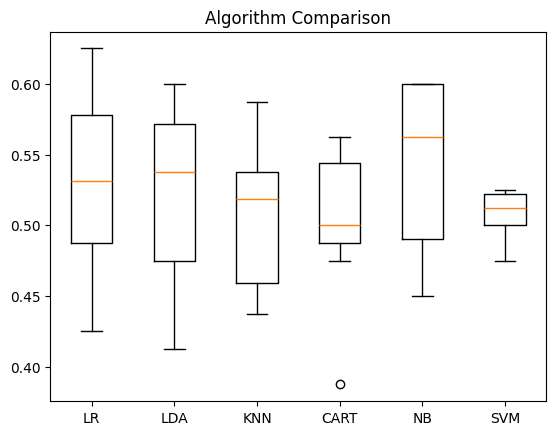

In [22]:
#Comparing Algorithm

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [23]:
X = array[:, 0:5] 
y = array[:, 18] #Graduation Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


## Making Presictions 

In [25]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1.]


## Evaluate Predictions 

In [26]:
print(accuracy_score(y_test, predictions))

0.525


In [27]:
confusion_matrix(y_test, predictions)

array([[ 6, 86],
       [ 9, 99]], dtype=int64)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.40      0.07      0.11        92
         1.0       0.54      0.92      0.68       108

    accuracy                           0.53       200
   macro avg       0.47      0.49      0.39       200
weighted avg       0.47      0.53      0.42       200



## Logistic Regression

In [30]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model

LogisticRegression(multi_class='ovr', solver='liblinear')

In [31]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [33]:
predictions = model.predict(X_test)
print(predictions)

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0.]


In [34]:
accuracy_score(y_test, predictions)

0.52

In [35]:
confusion_matrix(y_test, predictions)

array([[41, 51],
       [45, 63]], dtype=int64)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.48      0.45      0.46        92
         1.0       0.55      0.58      0.57       108

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.52       200



============================================

# Classification Problem

In [38]:
df.columns

Index(['math_score', 'science_score', 'study_hours', 'reading_score',
       'final_marks', 'employment_status', 'religion', 'geographic_info',
       'teaching_method', 'teaching_materials', 'technology_use', 'passed',
       'attendance_rate', 'class_participation', 'assignment_completed',
       'presentation_marks', 'group_work', 'field_work', 'graduation_status',
       'scholarship', 'online_learning'],
      dtype='object')

In [39]:
X = df[['math_score', 'science_score', 'study_hours', 'reading_score', 'final_marks', 'employment_status', 
        'passed']]
y = df['graduation_status']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((800, 7), (200, 7), (800,), (200,))

# Support Vector Machine 

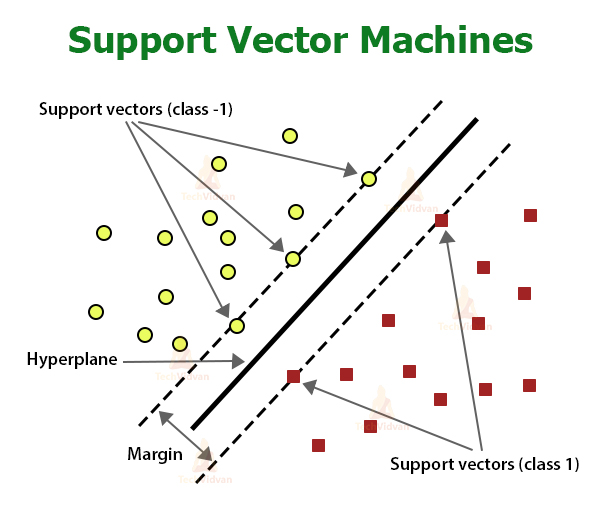

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [48]:
model = SVC()
model

SVC()

In [49]:
#Training the Models 
model.fit(X_train, y_train)

SVC()

In [50]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [51]:
#Checking Accuracy 
accuracy = model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.53


In [52]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.53


======================================================

# Logistic Regression

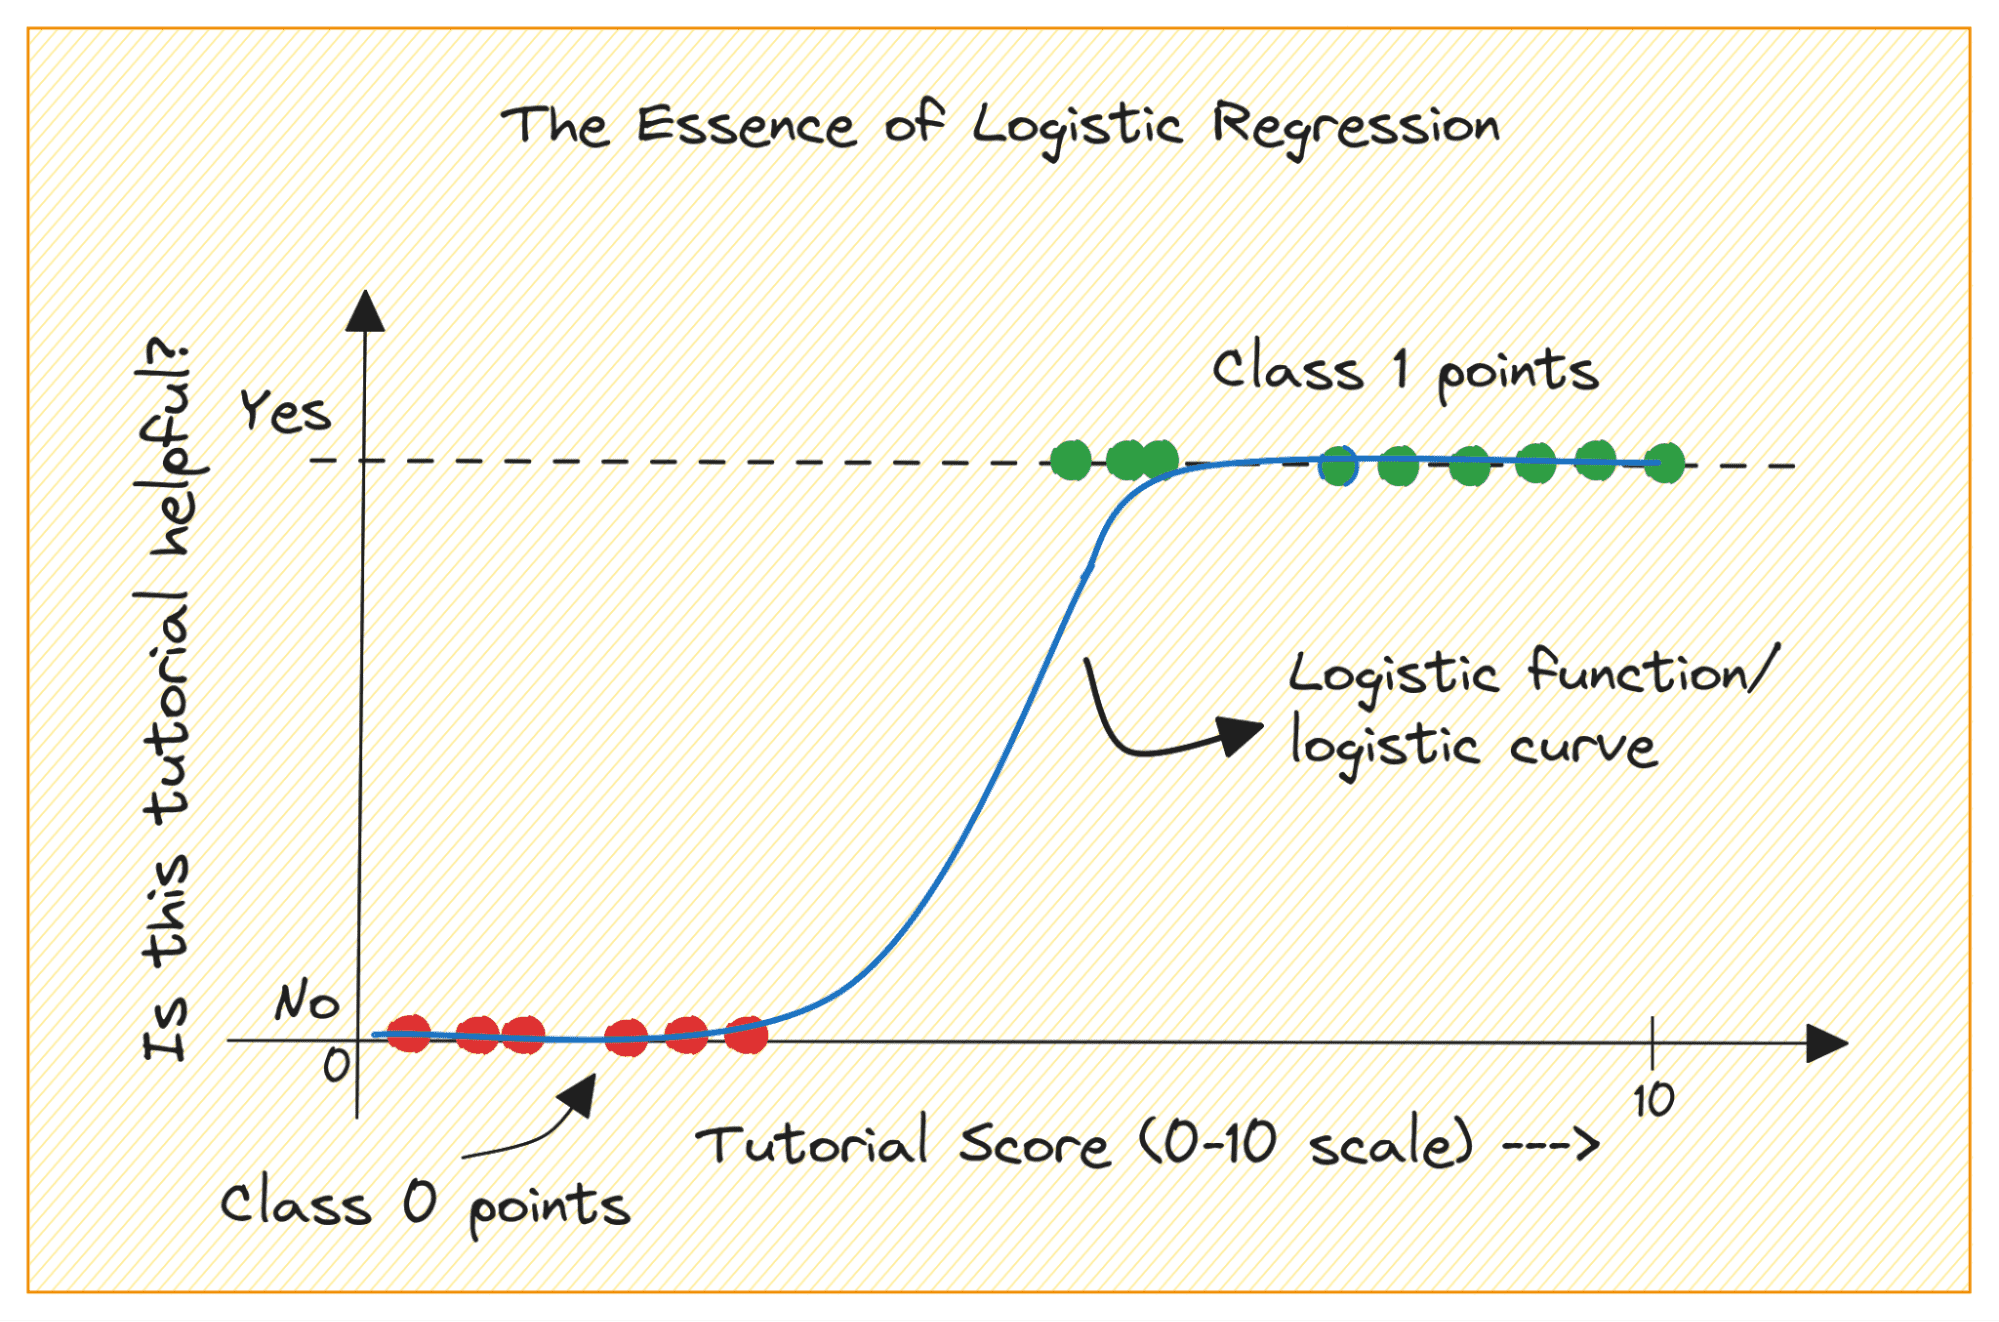

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model

LogisticRegression(max_iter=1000)

In [58]:
#Training the Model 
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
predictions = logistic_model.predict(X_test)    
print(predictions)

[0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0]


## Evaluating the Model

In [60]:
accuracy = accuracy_score(y_test, predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")  

Logistic Regression Accuracy: 0.50


In [61]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[34 58]
 [42 66]]


In [62]:
#Classification Report 
class_report = classification_report(y_test, predictions)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.37      0.40        92
           1       0.53      0.61      0.57       108

    accuracy                           0.50       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.50      0.49       200



=========================================================

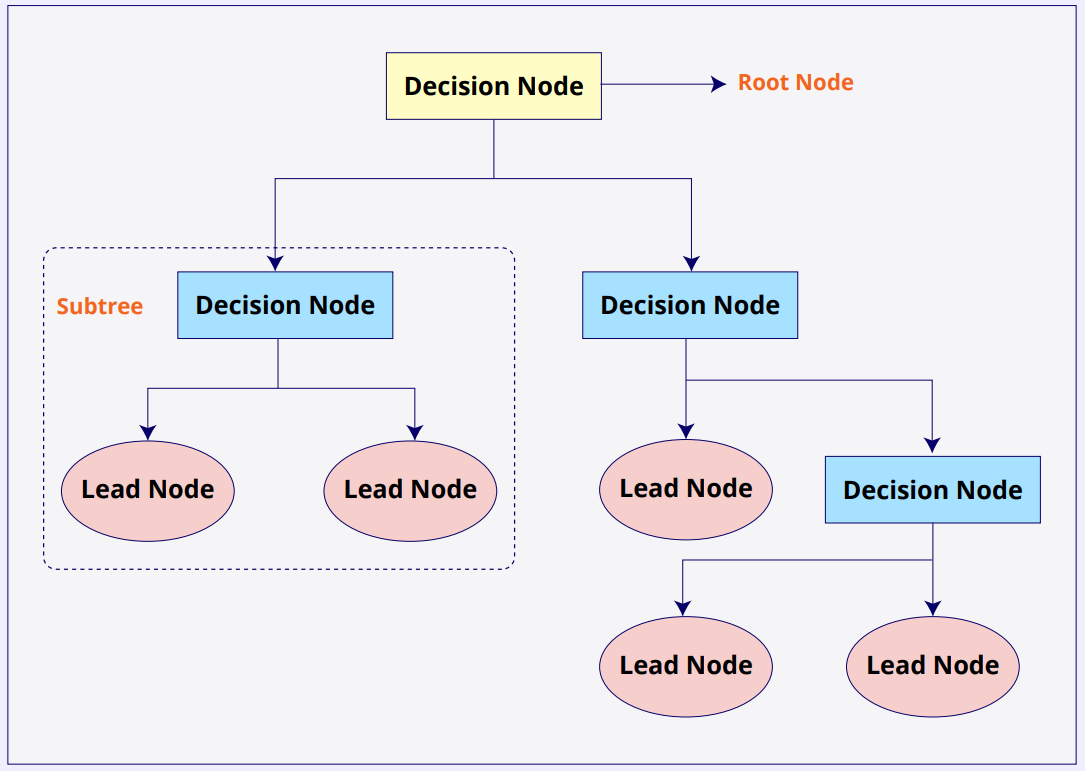

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model

DecisionTreeClassifier()

In [65]:
#Training the Model 
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
#Predictions 
predictions = decision_tree_model.predict(X_test)
print(predictions)

[1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0]


In [67]:
#Evaluating the Model
accuracy = decision_tree_model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")    

Decision Tree Accuracy: 0.52


In [68]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.515


========================================================

# Random Forest Classifier

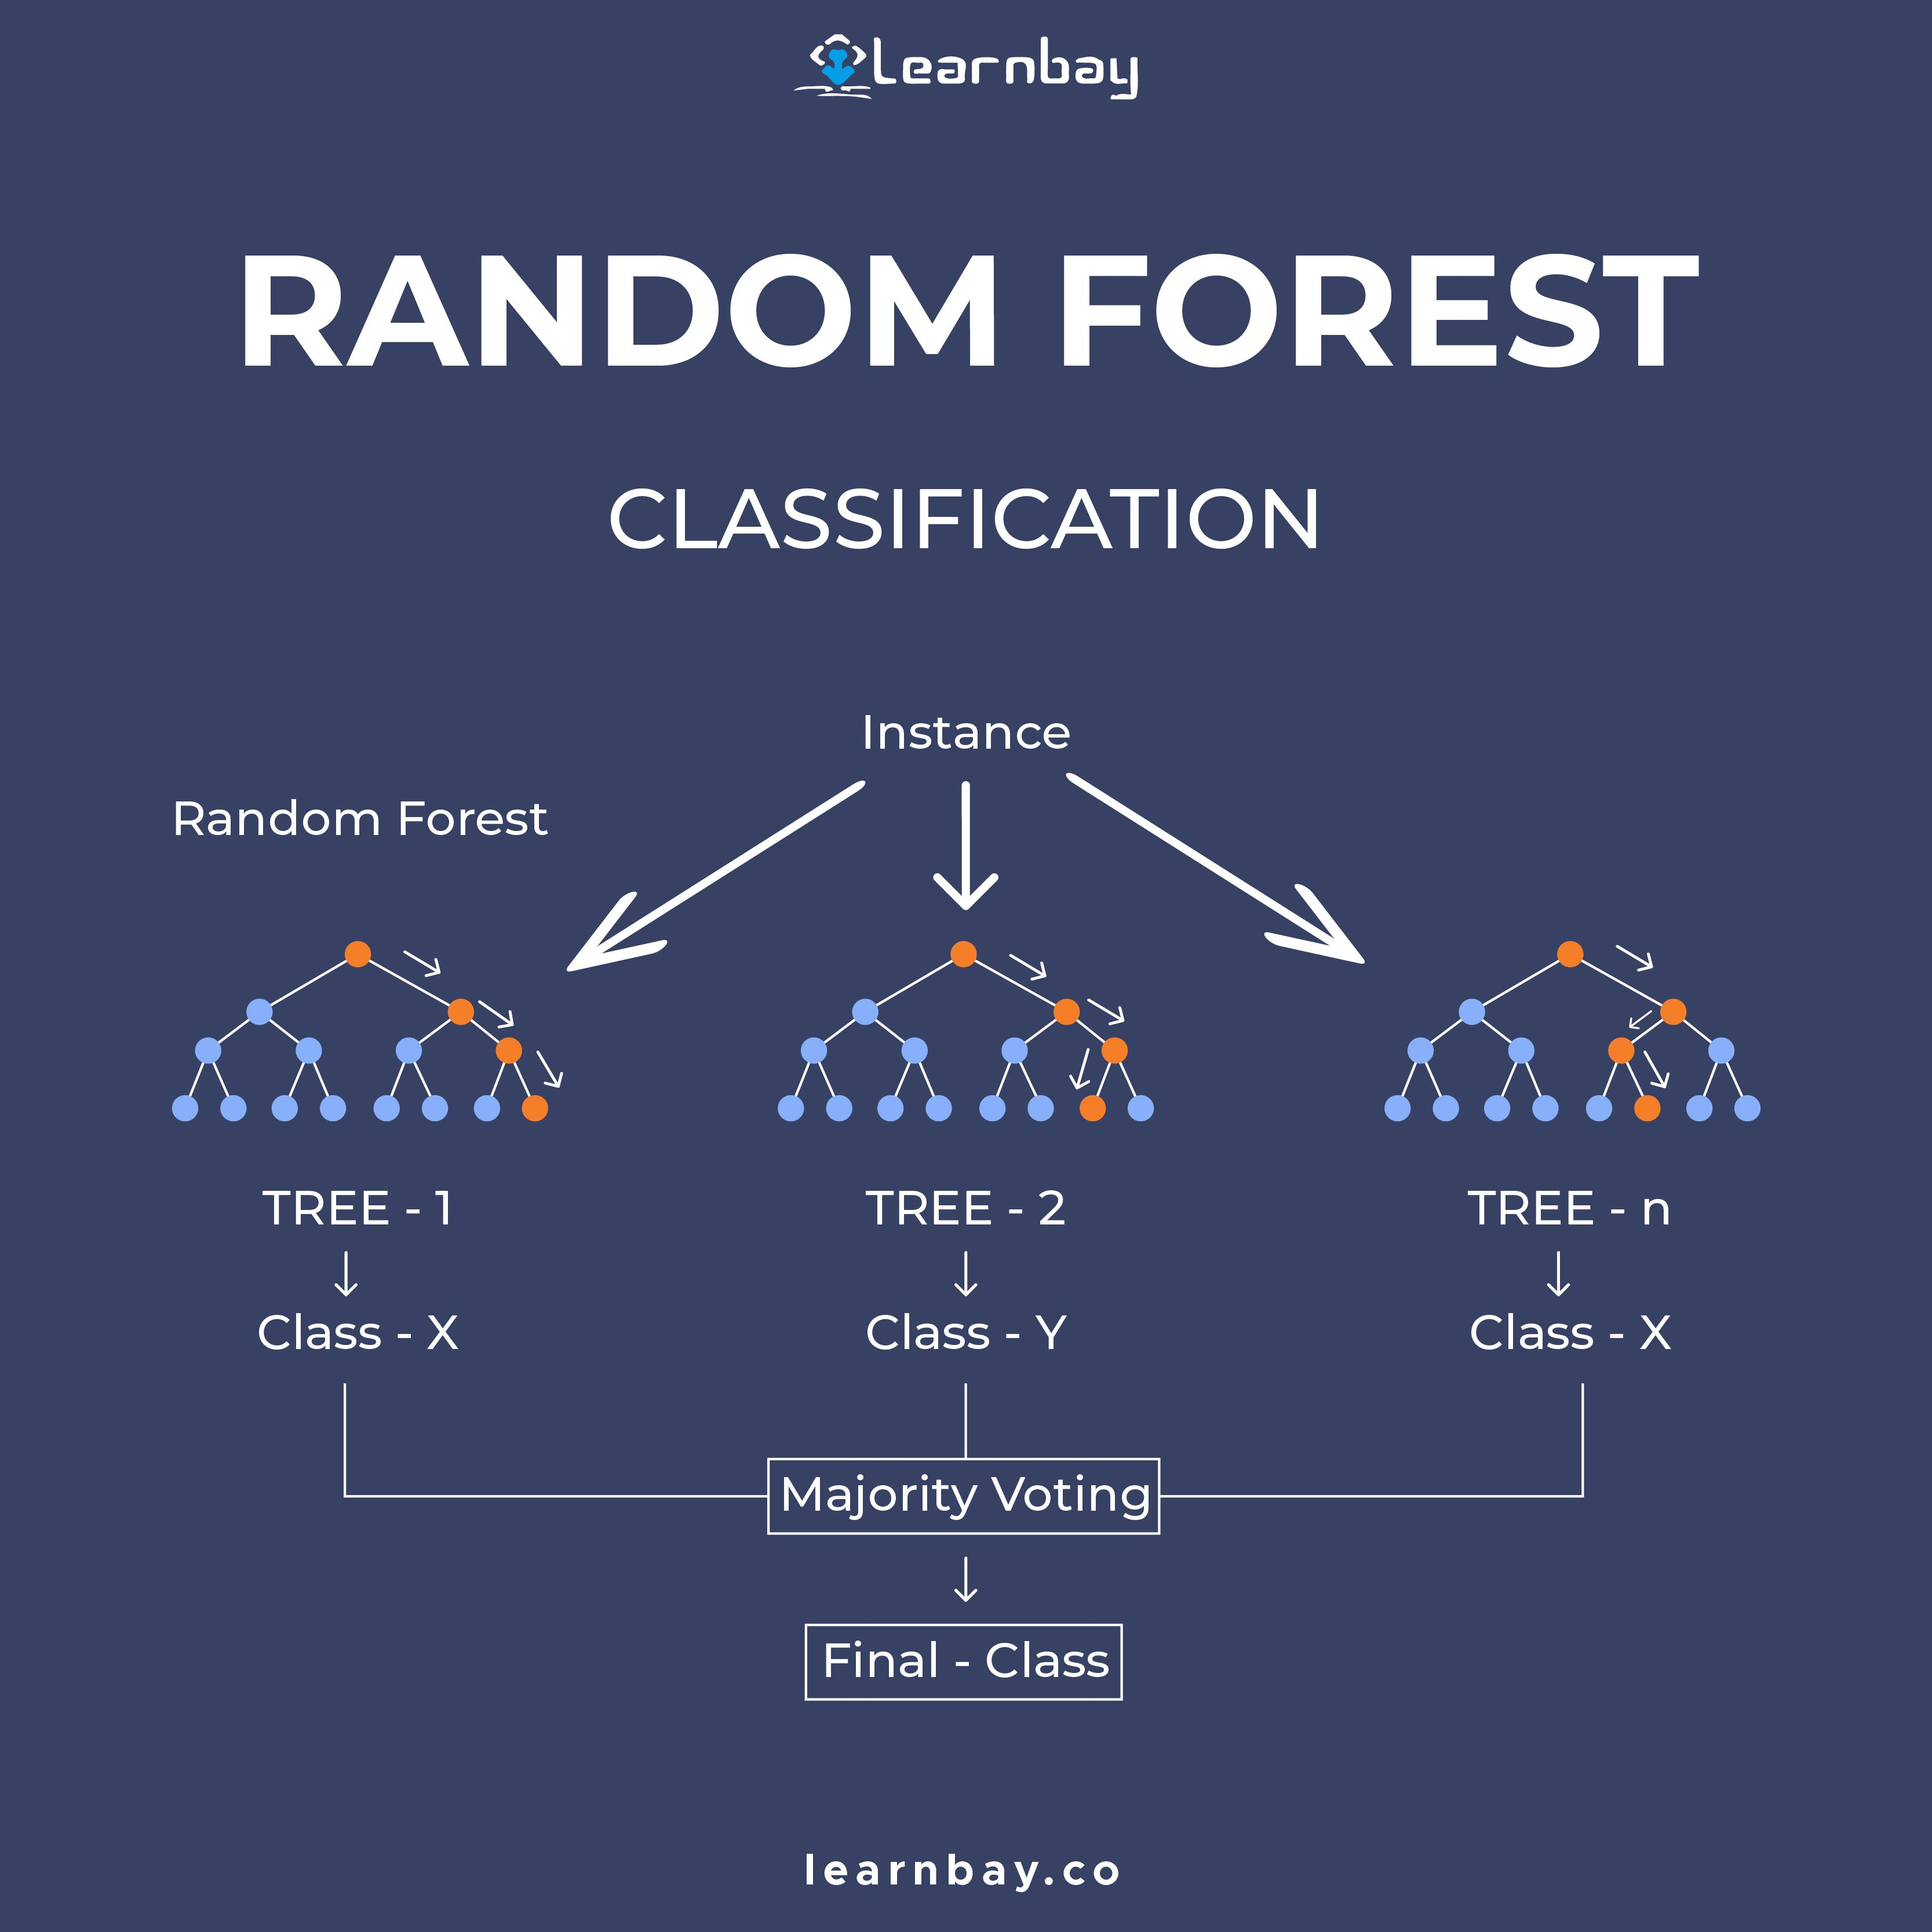

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
random_forest_model = RandomForestClassifier()
random_forest_model

RandomForestClassifier()

In [71]:
#Training the Model 
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
predictions = random_forest_model.predict(X_test)   
print(predictions)

[0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1]


In [73]:
#Evaluating the Model 
accuracy = random_forest_model.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

Random Forest Classifier Accuracy: 0.53


=========================================================================================================

# K-Nearest Neighbors Classifier

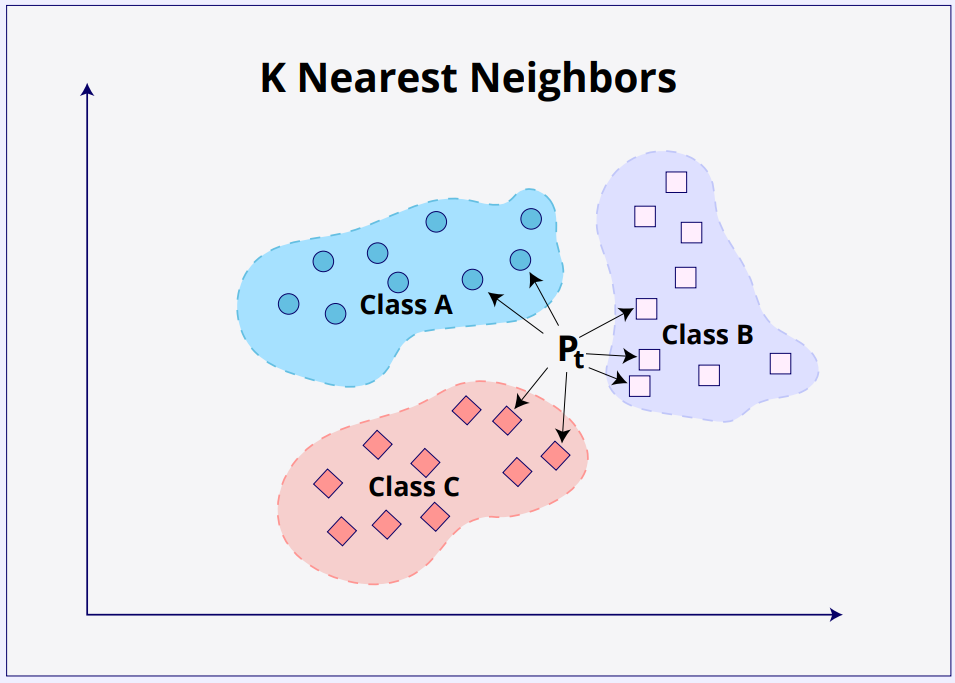

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
k = 5 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model

KNeighborsClassifier()

In [76]:
#Training the Model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
#Predictions 
predictions = knn_model.predict(X_test)
print(predictions)

[0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1
 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0]


In [78]:
#Evaluating the Model
accuracy = knn_model.score(X_test, y_test)
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.49


In [79]:
#Next method 
accuracy = accuracy_score(y_test, predictions)  
print(accuracy)

0.49


==========================================================================================

# Regression and Predictions 

In [82]:
df.columns

Index(['math_score', 'science_score', 'study_hours', 'reading_score',
       'final_marks', 'employment_status', 'religion', 'geographic_info',
       'teaching_method', 'teaching_materials', 'technology_use', 'passed',
       'attendance_rate', 'class_participation', 'assignment_completed',
       'presentation_marks', 'group_work', 'field_work', 'graduation_status',
       'scholarship', 'online_learning'],
      dtype='object')

In [83]:
X = df[['math_score', 'science_score', 'study_hours', 'reading_score']]
y = df['final_marks']
X.columns

Index(['math_score', 'science_score', 'study_hours', 'reading_score'], dtype='object')

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

# Linear Regression

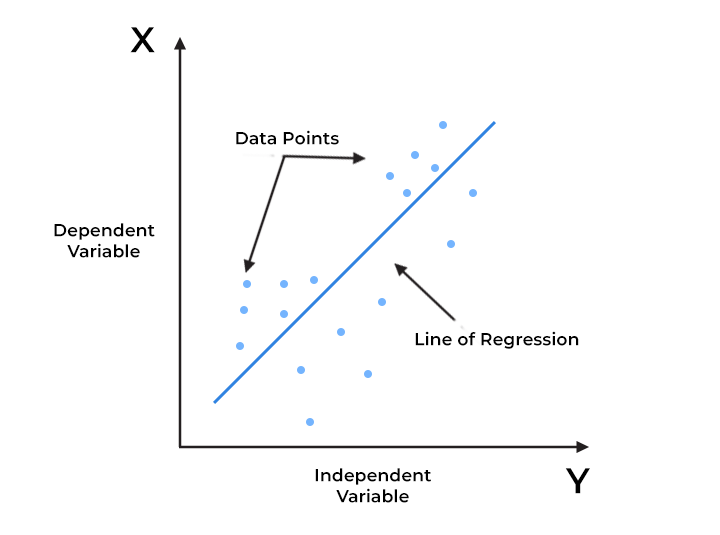

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()
lr

LinearRegression()

In [87]:
#Training the Model
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
#Predictions 
predictions = lr.predict(X_test)
print(predictions)

[303.63321205 375.62566783 319.35339821 346.77113027 337.33325059
 376.59769627 339.919396   334.90548988 309.84687747 362.36838793
 346.81642917 360.80076432 379.46067149 339.34770313 362.26258273
 281.46250734 293.8190931  379.9432946  377.66164    376.893166
 345.13590554 362.39419006 386.24117763 359.94314713 308.37530836
 369.2239473  349.86820462 326.49553886 354.14356556 339.00120599
 328.17602182 351.96748283 366.96169286 265.5334136  381.64324176
 358.62816642 347.93529561 382.09671032 344.4891802  380.03936005
 390.41621993 299.3029167  397.08428035 345.74347755 389.28008105
 283.13911183 383.18170858 275.88608925 373.82994003 271.348937
 358.32050163 379.05027695 356.74998984 329.18811085 328.60877073
 345.72192992 391.89055423 366.51566303 320.88231412 347.8297416
 374.82266625 383.90368344 388.78367076 436.60359678 366.78607468
 334.42181414 360.60496392 303.59356504 364.63208688 327.12419168
 362.35737681 338.47505486 359.44778578 330.63902979 348.03985355
 285.93015012 3

In [89]:
#Linear Equation (y = mx + c), slope and interecept
slope = lr.coef_
intercept = lr.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: [ 7.54108883e-02  1.66277967e-01  4.17973394e+01 -2.60640977e-02]
Intercept: 157.93166742777208


`## The Equation is: final_marks = 0.0754*math_score + 0.166*science_score + 41.79*study_hours - 0.026*reading_score + 157.93`

In [90]:
#Evaluating the Model 
accuracy = lr.score(X_test, y_test)
print(accuracy)

0.32450859177686464


In [93]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2_score = r2_score(y_test, predictions)
print(mse)
print(r2_score)

1590.3416777699615
0.32450859177686464


==================================================================================================================

# Support Vector Regressor (SVR)

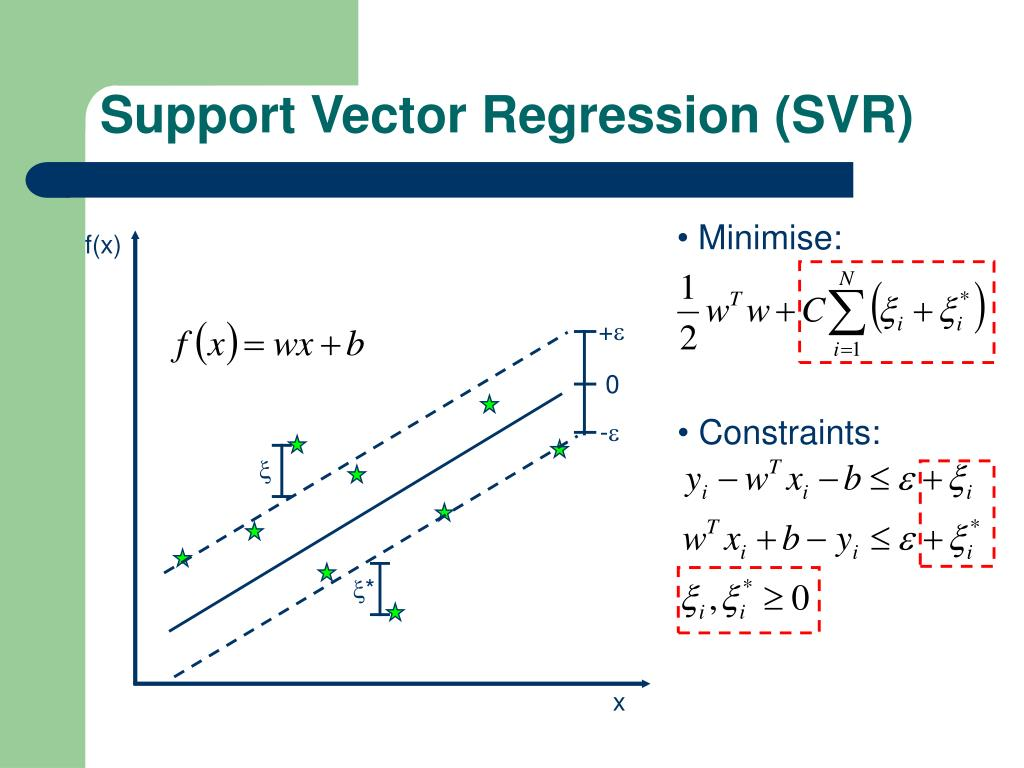

In [94]:
from sklearn.svm import SVR

In [100]:
X.columns

Index(['math_score', 'science_score', 'study_hours', 'reading_score'], dtype='object')

In [98]:
y.name

'final_marks'

In [101]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [102]:
predictions = model.predict(X_test)
print(predictions)

[305.66905369 372.55775547 321.64083973 348.13232095 338.64837141
 374.47734829 343.18751238 334.13879974 313.96916295 359.65277915
 346.1735112  360.68217297 377.82036341 337.34650671 361.03001437
 287.66219253 294.66498715 376.8031824  374.80157916 374.89441826
 346.62787053 359.45531651 382.10961559 358.59346171 310.99386299
 366.61968106 352.07388228 327.11705906 350.80910623 336.78947075
 330.02853023 349.66644017 366.07057254 271.56914893 381.71397469
 356.28201052 344.22806207 380.47476859 342.28541406 378.72048401
 386.73870975 301.23007348 393.91554373 345.79104293 386.7594026
 288.46034743 383.5082204  281.01343121 372.3868053  275.39883626
 357.77961694 377.88895026 356.7717271  329.15292808 330.39395643
 347.20773554 389.10286332 362.97578735 323.94144086 347.48053572
 371.75379706 385.10518363 385.79063173 429.21694136 366.27982157
 335.25957569 361.62974761 308.82931865 362.97249536 329.79027198
 362.78141771 338.92694263 360.91702531 330.69907193 348.56280277
 291.148578

In [104]:
print(model.coef_)
print(model.intercept_)

[[ 3.84273919e-02  2.59278206e-01  3.89942536e+01 -5.59027003e-02]]
[168.59996189]


In [106]:
#Evaluate the Model 
mse = mean_squared_error(y_test, predictions)
print(mse)

1595.2452907983027


============================================================================

# Decision Tree Regressor 

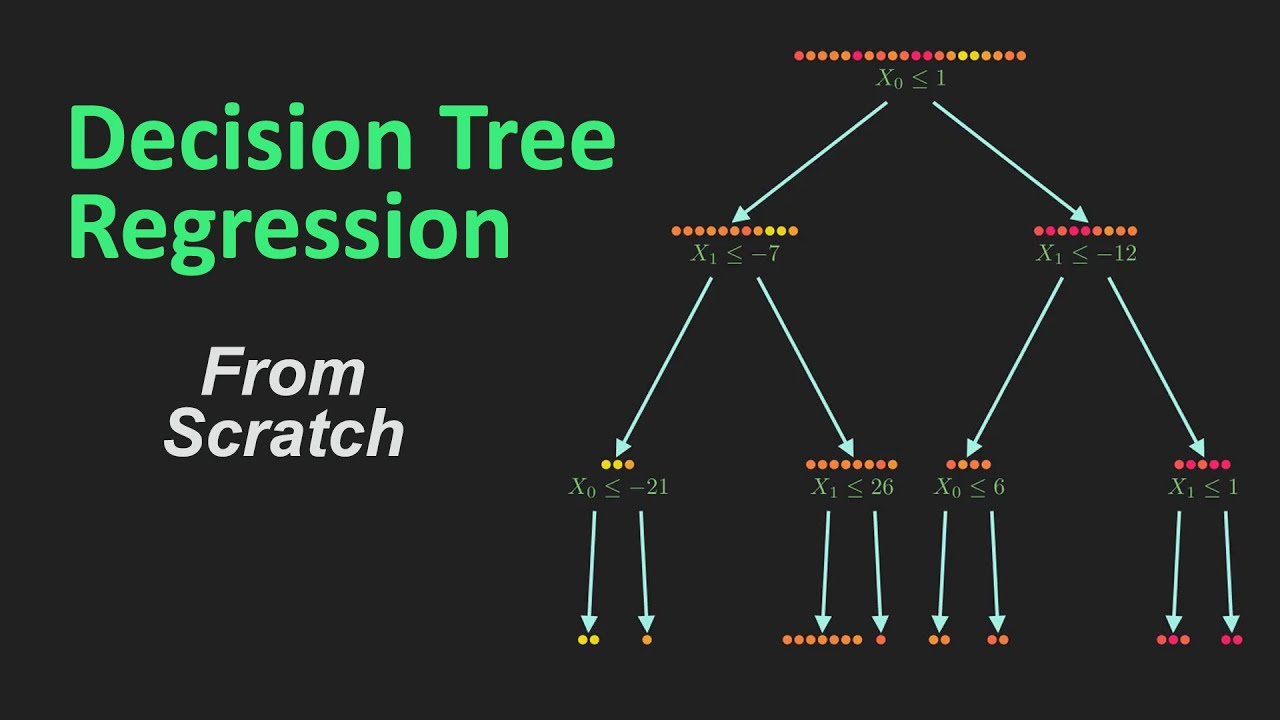

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [110]:
predictions = model.predict(X_test)
print(predictions)

[289.11 352.21 286.57 305.19 381.11 316.48 306.72 310.87 286.57 304.54
 344.61 373.92 424.48 355.63 324.39 265.58 290.51 383.94 450.19 373.89
 375.09 328.83 342.32 359.69 299.4  442.03 379.4  356.91 325.66 324.78
 360.67 407.66 374.07 189.8  370.39 304.54 338.4  450.19 303.46 339.78
 346.02 290.51 345.9  375.93 415.51 299.02 403.88 289.55 352.21 299.25
 367.77 301.47 333.35 356.91 392.63 354.3  345.9  404.4  299.4  328.8
 443.26 377.23 412.81 470.14 374.91 358.83 459.1  297.88 383.6  260.17
 353.42 344.61 363.62 350.03 340.87 265.58 329.21 377.15 374.07 349.
 401.23 390.21 411.63 304.7  450.19 299.4  403.6  393.97 403.88 341.04
 239.42 387.32 324.46 301.45 287.54 349.04 331.1  325.92 324.14 416.18
 386.96 469.75 384.38 342.32 396.51 343.2  442.03 343.2  376.35 384.24
 324.1  371.92 423.63 277.16 363.   325.7  351.4  328.29 321.48 407.02
 352.21 337.49 297.64 356.54 401.36 317.19 465.61 355.92 342.32 350.87
 345.87 297.88 399.09 324.3  336.18 375.58 427.32 370.39 298.62 434.23
 301.91 3

In [111]:
#Model Evaluation 
mse = mean_squared_error(y_test, predictions)
print(mse)

3042.5234809999993


In [112]:
r2_score = r2_score(y_test, predictions)    
print(r2_score)

-0.29229995004251164


========================================================================================================================================================

# Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
model = RandomForestRegressor() 
model.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
predictions = model.predict(X_test)
print(predictions)

[289.8943 358.7874 302.509  341.1983 361.4403 385.6867 339.3282 325.5896
 284.8153 358.8914 356.7126 363.0529 375.5092 354.3536 338.3179 267.9323
 272.4545 354.0579 382.7634 377.1257 358.3125 366.7453 390.4883 361.26
 288.9929 375.4251 360.5303 350.1114 365.6077 340.2202 366.3072 357.5059
 371.4108 243.4723 387.3051 355.0016 352.9743 386.9372 359.0083 383.5938
 402.8178 284.9598 381.6834 361.6398 382.6613 277.8453 387.7855 280.7447
 382.8725 278.7772 362.649  384.855  371.1439 366.1618 368.7939 349.9769
 361.8281 387.4214 309.5799 365.6407 366.9005 383.9832 383.6819 417.5809
 373.4657 366.9865 376.0991 270.94   350.4898 323.0307 344.1823 365.7815
 371.9608 359.3143 355.3568 268.1754 372.5944 385.4166 373.6911 353.1452
 378.16   383.7377 384.9789 395.9203 401.5413 295.1592 365.5203 369.6963
 387.5623 349.3341 281.0295 352.172  339.3292 350.8308 293.145  389.6079
 304.407  360.6796 337.0504 360.6111 374.7918 408.7441 358.9367 350.4276
 351.5156 347.832  362.9054 353.9809 336.0035 366.766

In [116]:
#Model Evaluation 
mse = mean_squared_error(y_test, predictions)
print(mse)  

1720.6688066285005


In [117]:
r2_score = r2_score(y_test, predictions)
print(r2_score)

TypeError: 'numpy.float64' object is not callable

# KNN Regression

In [118]:
from sklearn.neighbors import KNeighborsRegressor   

In [119]:
model = KNeighborsRegressor(n_neighbors=5)  
model.fit(X_train, y_train)

KNeighborsRegressor()

In [120]:
predictions = model.predict(X_test)
print(predictions)

[318.032 360.28  315.19  331.264 368.37  316.232 364.802 369.504 371.404
 356.43  355.662 376.39  357.67  339.674 353.73  353.996 356.114 335.218
 345.272 374.21  349.422 378.1   328.676 349.772 340.356 385.33  330.998
 388.39  332.584 376.708 349.216 379.414 322.616 362.828 342.728 370.53
 331.788 337.216 361.21  364.054 347.55  348.432 380.536 380.898 342.902
 362.704 351.744 426.636 400.298 330.72  329.506 399.8   331.444 316.674
 351.652 391.286 358.618 383.714 282.42  362.372 353.602 334.732 333.98
 372.026 342.266 320.022 336.434 352.604 358.448 366.41  356.898 384.574
 338.252 344.97  358.744 327.796 352.12  367.396 378.484 306.006 349.194
 406.896 401.636 391.862 322.476 390.072 351.326 344.812 359.522 363.136
 418.318 375.314 311.044 368.752 383.328 330.262 320.964 341.912 321.49
 343.538 372.614 327.052 381.478 357.488 383.912 336.262 345.994 321.834
 342.406 348.412 329.968 365.14  369.026 357.032 348.702 352.94  356.256
 344.878 334.484 357.828 350.064 361.724 363.382 366.9

In [121]:
mse = mean_squared_error(y_test, predictions)   
print(mse)  

2968.0058560800007


In [122]:
r2_score = r2_score(y_test, predictions)
print(r2_score)

TypeError: 'numpy.float64' object is not callable